# **Predicting** **Customer** **Churn** **For** **A** **Leading** **Telecom** **Company**



## Motivation:


Also known as customer attrition, or customer turnover is the loss of clients or customers. Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new ones.

Companies usually make a distinction between voluntary churn and involuntary churn. In most analyses involuntary churn is excluded.

Predictive analytics uses machine learning to predict the likelihood of a customer churning. These models will identify a small subgroup of potential customers that are at a higher risk of abandoning the company. This empowers the company to focus on the subset of the customers who are most likely to churn and through customer retention marketing programs stop some of that to happen.

## Dataset Source and Information:

The Customer Churn table contains information on all 7,043 customers from a Telecommunications company in California in Q2 2022. Each record represents one customer, and contains details about their demographics, location, tenure, subscription services, status for the quarter (joined, stayed, or churned), and more.

The public dataset is completely available on the Maven Analytics website platform where it stores and consolidates all available datasets for analysis in the Data Playground.


**The specific telecom customer churn dataset:**

https://www.mavenanalytics.io/blog/maven-churn-challenge

**Kaggle Link**:

 https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics?select=telecom_customer_churn.csv

 **Link to the database:**

 https://drive.google.com/file/d/1xOgDFeALpXVZTMsNyWSQy5SCBJjO8TLW/view?usp=sharing

## About Data

The data set includes information about:

* Customers who left - the column is called `Churn`
* Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers - gender, age range, and if they have partners and dependents

Each row represents a customer, each column contains customer's attributes described as below:

* **customerID**: Customer ID
* **gender**: Customer gender (female, male)
* **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenure**: Number of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not (Yes, No)
* **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService**: Customer's internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not (Yes or No)



## Outline of our Solution Approach

**1.** **Reading and** **Understanding** **Dataset**

1.1   Load the dataset

1.2   Basic Data Exploration

**2. Data Preprocessing and Cleaning**

2.1   Finding Null Values

2.2   Handling Null Values

2.3   Finding outliers

2.4   Data transformation

**3.  Feature Selection**

3.1 Univariate Feature Selection

3.2 Sequential Feature Selection

3.3 Train Test Split

**4. Different Classification Models**

4.1 Random Forest

4.2 kNN

4.3 Support Vector Machine

4.4 Logistic Regression

**5. Accounting for Imbalance Data**

**6. Hyperparameter using Grid Random Forest
 Tune hyper** **parameters**

**7. Evaluating error on the untest data**

**8. Boosting**

**9. Conclusion**

### **1. Reading and Understanding Dataset**

#### 1.1 Let's start by importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Connecting to the database

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = '/content/drive/MyDrive/BA810 datasets/'

Here, we are reading our dataset, on which we will be working further

In [ ]:
telecom = pd.read_csv(data_folder+'telecom_customer_churn.csv') # skip the first column (0'th) containing row numbers.
telecom.head(3)

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status Churn Category  \
0                      381.51        974.81           Stayed            NaN   
1                       96.21        610.28           Stayed            NaN   
2                      134.60        415.45          Churned     Competitor   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  

[3 rows x 38 columns]

Our dataset has 38 columns in total and 7,043 customer data in total. If we see further information, we see that there are a lot of nulls in some of the columns, which we will treat later below.

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

#### 1.2 Let's start with some data visuals and summary reports to gain knowledge about the business here.

Let's check the distribution of data values across different columns for the dataset.

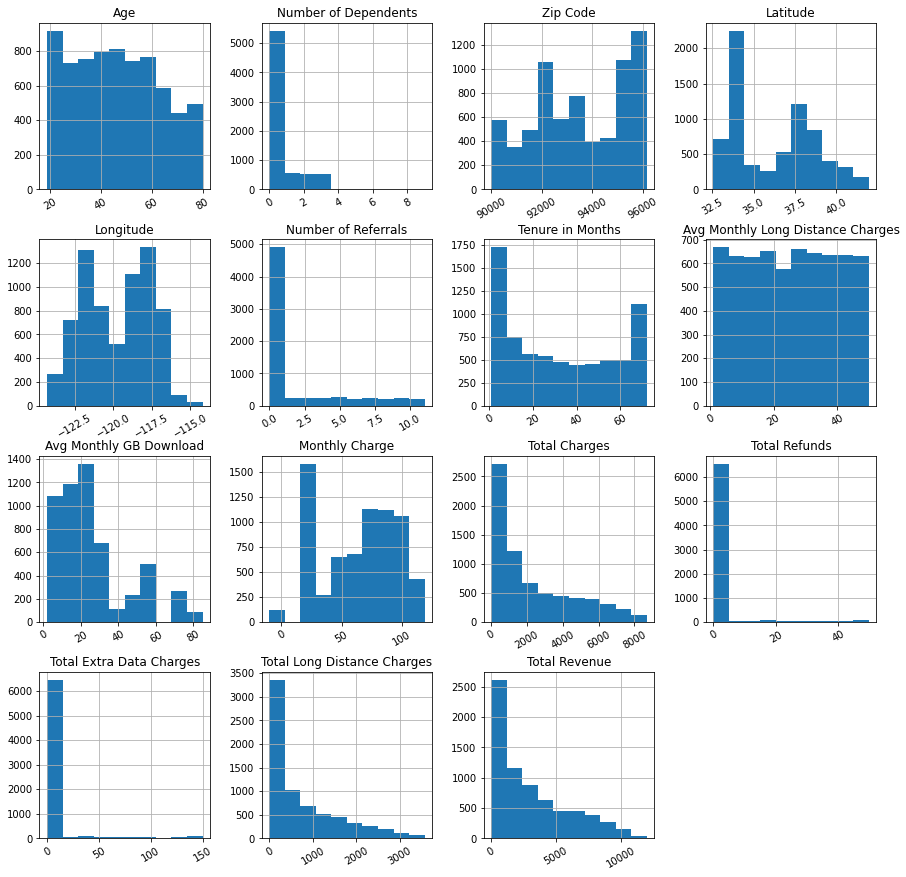

In [ ]:
telecom.hist(figsize=(15,15), xrot=30);

From the above results, we can see that some of the variables such as are Number of dependents, Number of Referrals, Total Refunds, Total Extra Data charges. For example, if we look at the Number of Referrals the value zero is dominant when compared to other values. So when we are taking these variables into consideration for the models, we should keep the skewness in mind because it might degrade the model's ability.

We can check out some statistics value for our dataset here.

In [ ]:
telecom.describe()

Age  Number of Dependents      Zip Code     Latitude  \
count  7043.000000           7043.000000   7043.000000  7043.000000   
mean     46.509726              0.468692  93486.070567    36.197455   
std      16.750352              0.962802   1856.767505     2.468929   
min      19.000000              0.000000  90001.000000    32.555828   
25%      32.000000              0.000000  92101.000000    33.990646   
50%      46.000000              0.000000  93518.000000    36.205465   
75%      60.000000              0.000000  95329.000000    38.161321   
max      80.000000              9.000000  96150.000000    41.962127   

         Longitude  Number of Referrals  Tenure in Months  \
count  7043.000000          7043.000000       7043.000000   
mean   -119.756684             1.951867         32.386767   
std       2.154425             3.001199         24.542061   
min    -124.301372             0.000000          1.000000   
25%    -121.788090             0.000000          9.000000   
50%    -119.595293             0.000000         29.000000   
75%    -117.969795             3.000000         55.000000   
max    -114.192901            11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

For some of the columns, like Total Extra Data Charges, Total refunds, etc, the data values are pretty skewed.

From these pivot tables below, we can see that -

For all three types of contracts customers who churned were paying a higher monthly amount with the exception of the ones who didn't have a phone service.
The tenure of the customers on a month-to-month contract is a major predictor

In [ ]:
telecom.pivot_table(values='Monthly Charge', index='Contract', columns='Customer Status', aggfunc='mean')

Customer Status    Churned     Joined     Stayed
Contract                                        
Month-to-Month   71.784230  42.392279  62.284131
One Year         85.050904  35.622917  62.390404
Two Year         86.777083  57.695455  60.781081

In [ ]:
telecom.pivot_table(values='Monthly Charge', index=['Contract', 'Multiple Lines'], columns='Customer Status', aggfunc='mean')

Customer Status                  Churned     Joined     Stayed
Contract       Multiple Lines                                 
Month-to-Month No              64.946474  41.740937  54.533750
               Yes             86.868837  59.691250  79.809915
One Year       No              77.111017  34.409091  50.719880
               Yes             95.886022  72.100000  80.950090
Two Year       No              67.695000  54.983333  44.332596
               Yes             95.341429  69.900000  75.144545

In [ ]:
telecom.pivot_table(values='Tenure in Months', index='Contract', columns='Customer Status', aggfunc='mean')

Customer Status    Churned    Joined     Stayed
Contract                                       
Month-to-Month   14.016918  1.705882  25.042663
One Year         44.963855  1.875000  41.494853
Two Year         61.270833  1.818182  54.353006

Visualizing the number of customers who churned, stayed or joined in the company with a bar plot

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


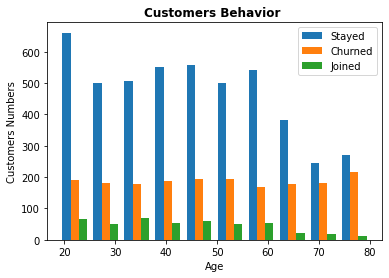

In [ ]:
Customer_Stayed=telecom[telecom['Customer Status']=='Stayed'].Age
Customer_Churned=telecom[telecom['Customer Status']=='Churned'].Age
Customer_Joined=telecom[telecom['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend();

From the above histogram, it is evident that for each different range of ages we have three categories which are stayed, churned and joined. And here we can see the imbalance of the data because the number of people who stayed are way more higher than the number of the people who are churned. This imbalance has been treated further.



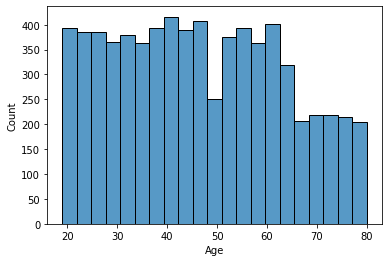

In [ ]:
sns.histplot(telecom['Age']);

We have observed that Age is one of the highly correlated variable. It is positively skewed. At each range we have enough data to take this variable into consideration.

Let's check with the correlation of the data values.

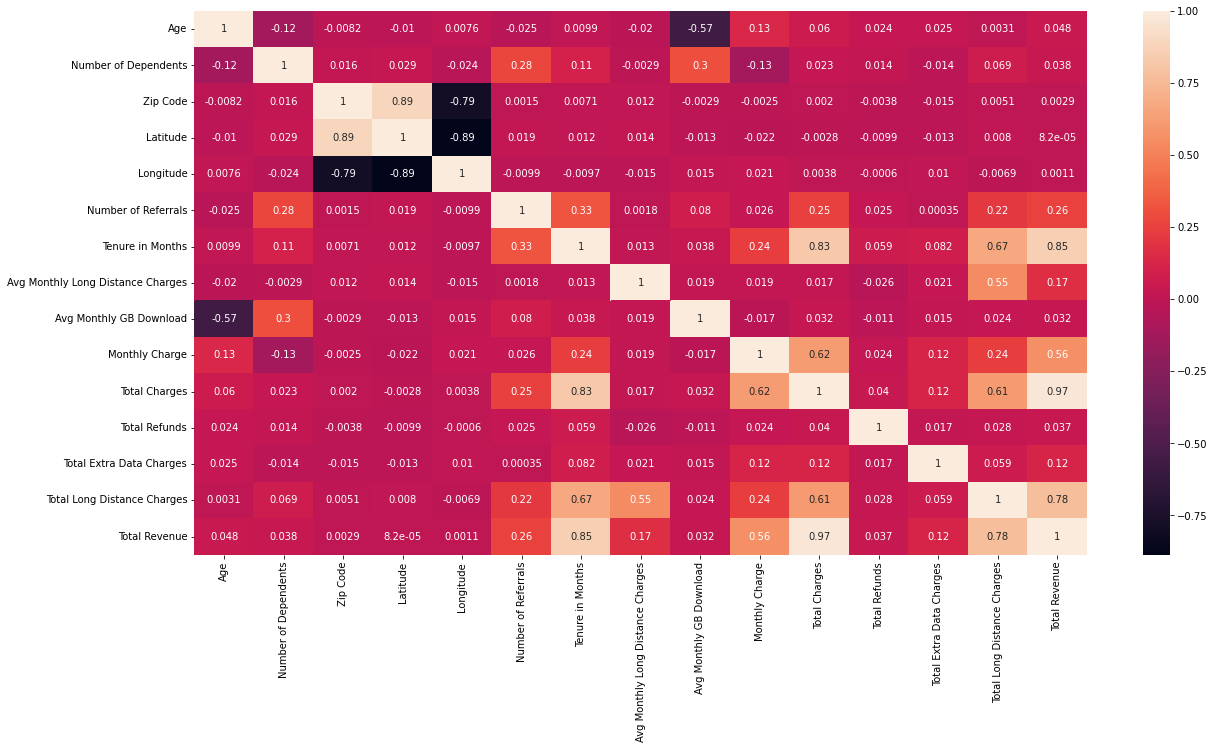

In [ ]:
data  = telecom.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True);

Based on the correlation maps we can see that Total Charges and Total Long Distance Charges are highly correlated with Total Revenue

Also ZipCode, latitude and longitude are correlated to each other.

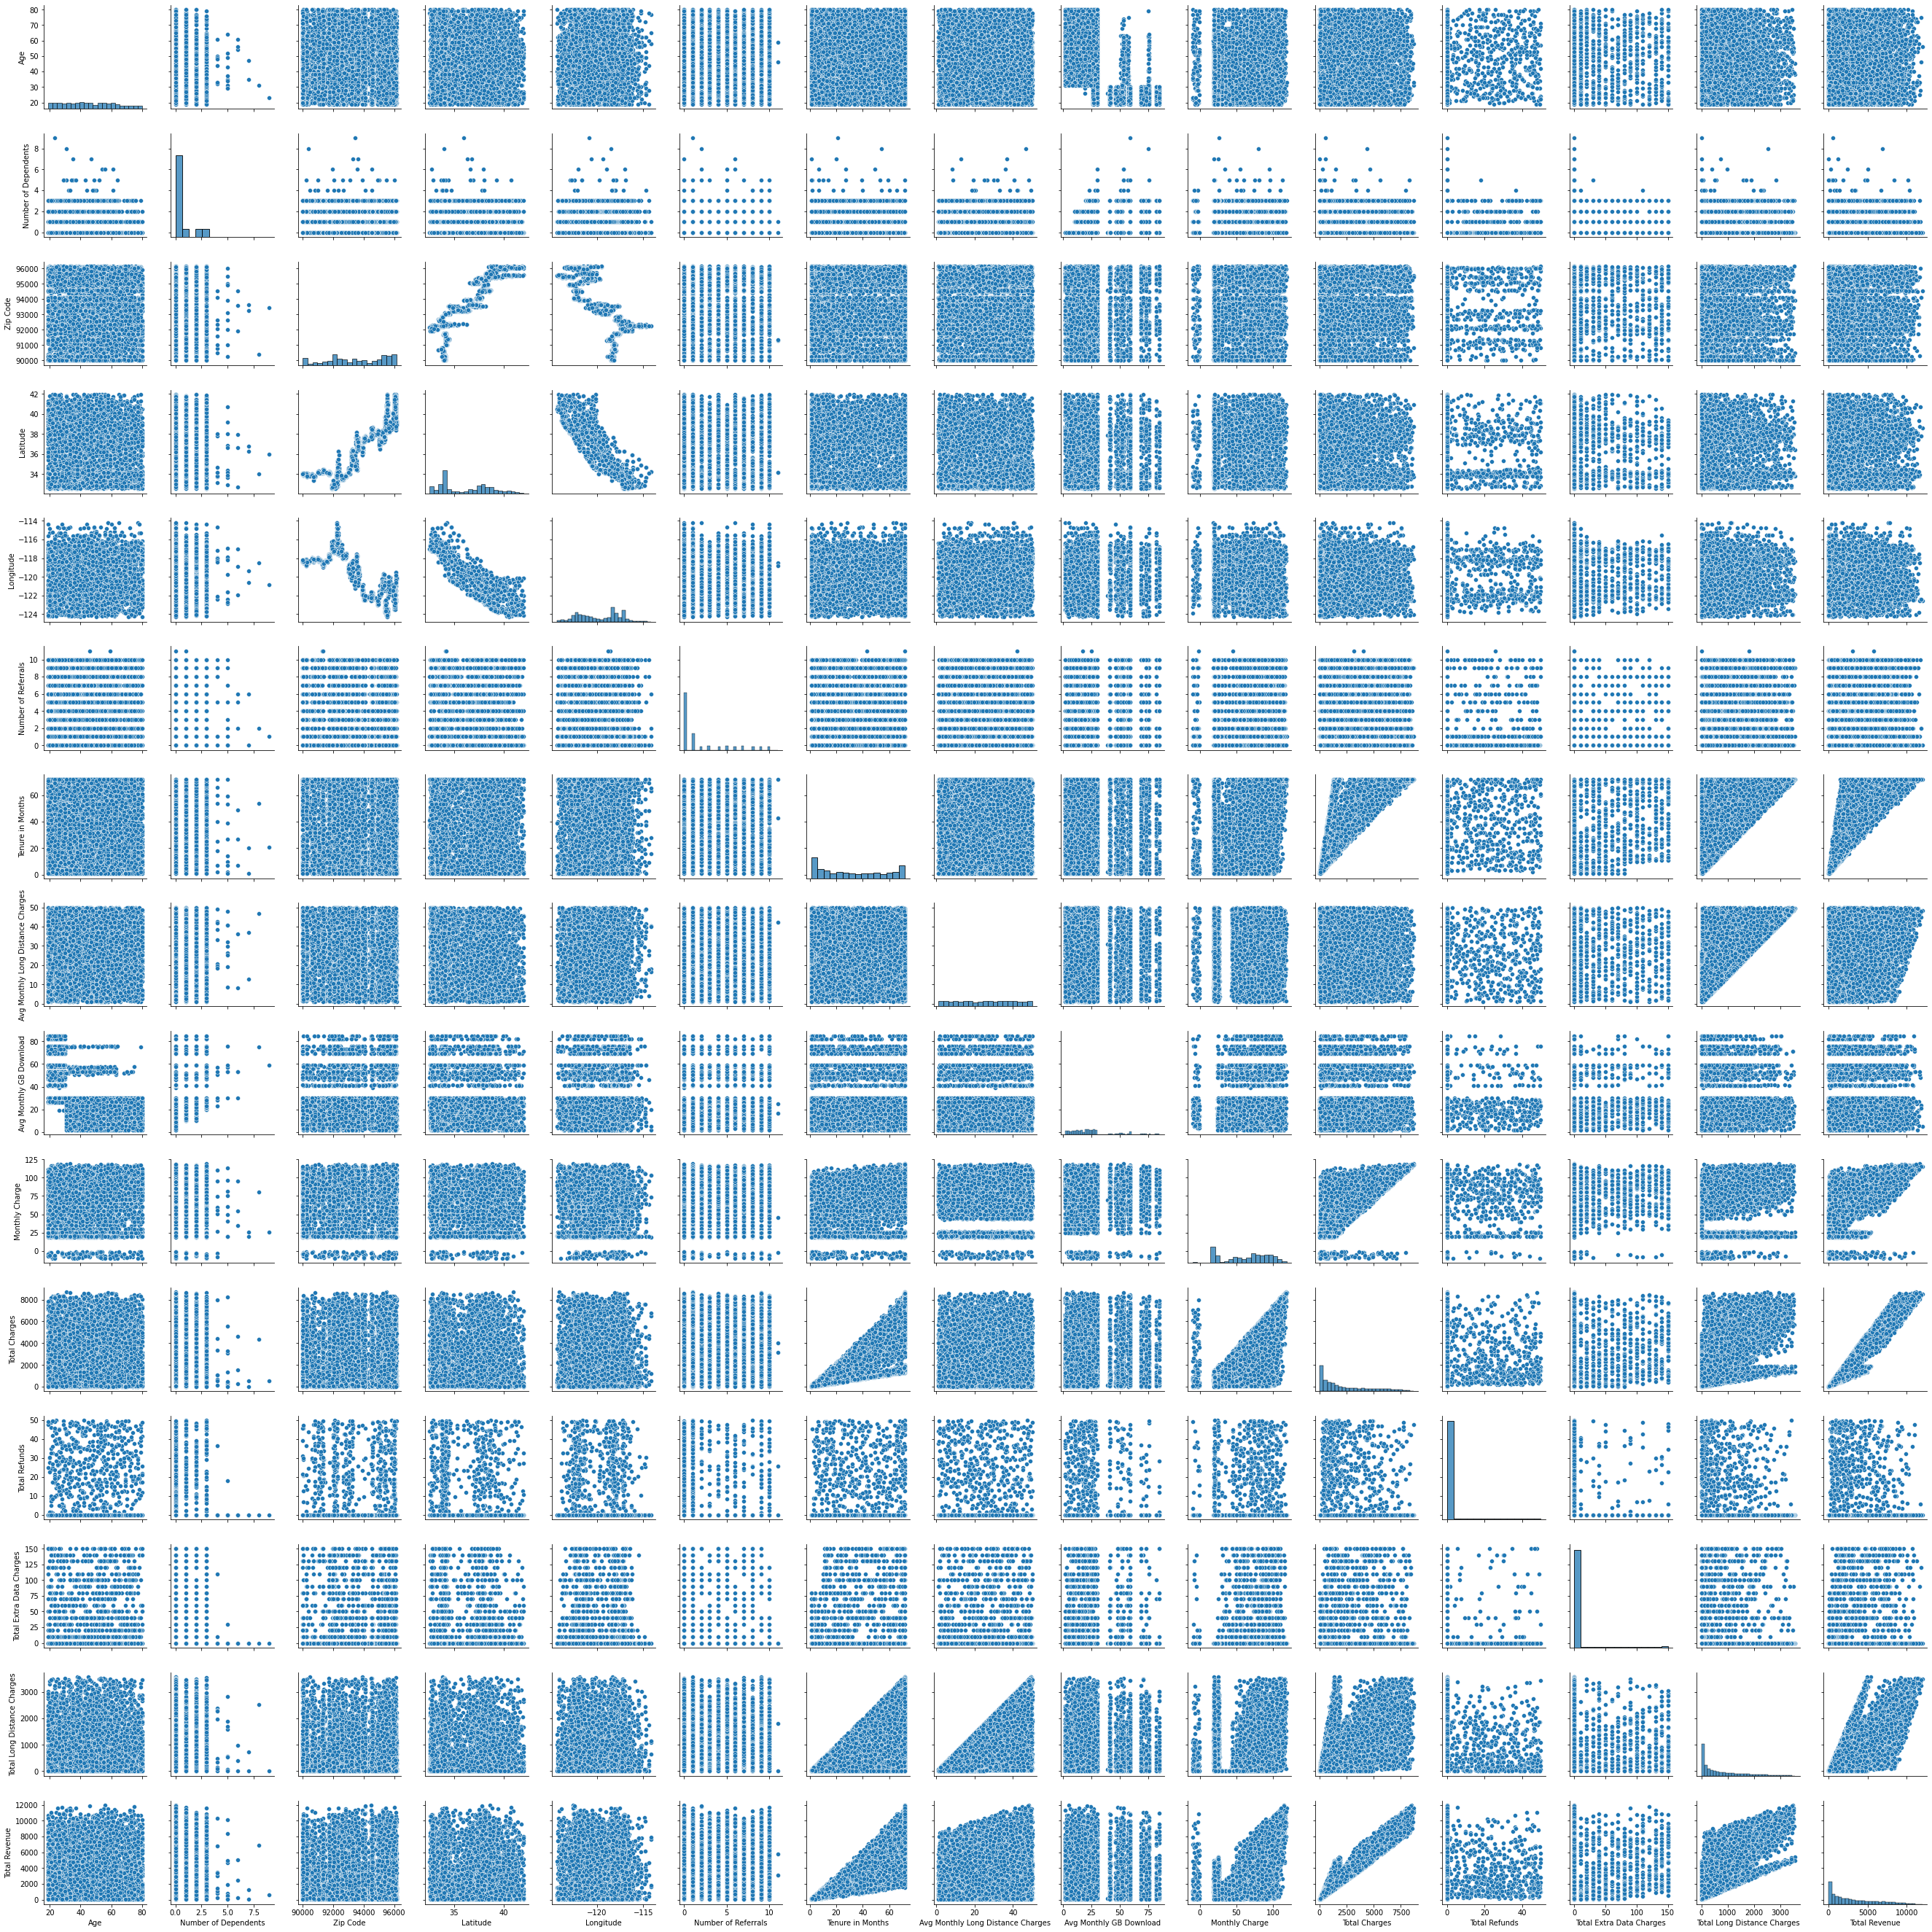

In [ ]:
sns.pairplot(telecom)

In [ ]:
import plotly.express as px
fig = px.histogram(telecom, x="Customer Status", template ='xgridoff',barmode = "group", title = "<b>Customer status distribution<b>")
fig.update_layout(width=400, height=400, bargap=0.2)
fig.show()

When it comes to the customer status, the count of the people who stayed is more than the count of the people who joined and churned.

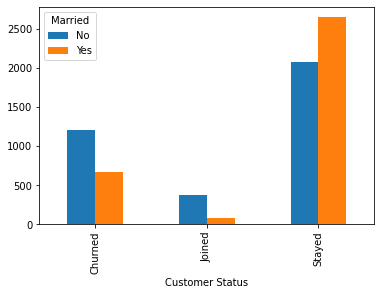

In [ ]:
pd.crosstab(telecom['Customer Status'], telecom['Married']).plot(kind='bar');

From the above figure, it is clear that the percentage of people who are married is more than the people

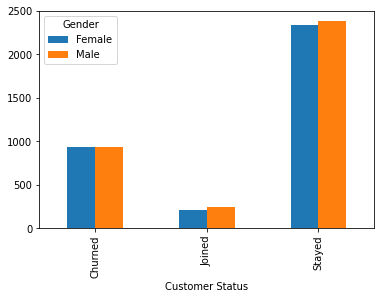

In [ ]:
pd.crosstab(telecom['Customer Status'], telecom['Gender']).plot(kind='bar')

From the above figure, it looks like the count between the male and female customers is same when it comes to the churned, joined and stayed categories

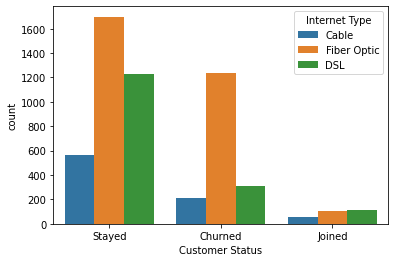

In [ ]:
sns.countplot(data=telecom, x='Customer Status', hue='Internet Type');

Considering the different internet types, Fiber optic type has more number of people irrespective of the customer status

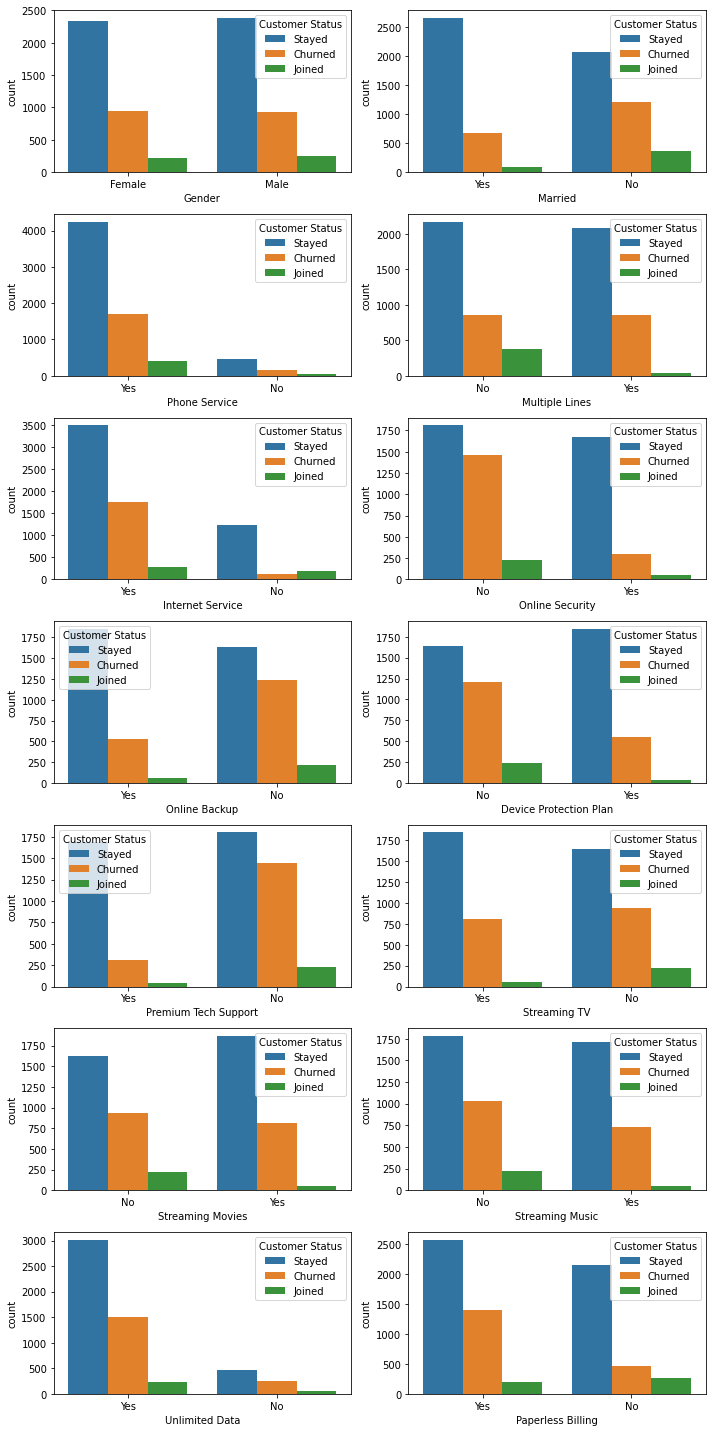

In [ ]:
fig,axes=plt.subplots(7,2,figsize=(10,20))
sns.countplot(x="Gender",hue='Customer Status',data=telecom,ax=axes[0,0])
sns.countplot(x="Married",hue='Customer Status',data=telecom,ax=axes[0,1])
sns.countplot(x="Phone Service",hue='Customer Status',data=telecom,ax=axes[1,0])
sns.countplot(x="Multiple Lines",hue='Customer Status',data=telecom,ax=axes[1,1])
sns.countplot(x="Internet Service",hue='Customer Status',data=telecom,ax=axes[2,0])
sns.countplot(x="Online Security",hue='Customer Status',data=telecom,ax=axes[2,1])
sns.countplot(x="Online Backup",hue='Customer Status',data=telecom,ax=axes[3,0])
sns.countplot(x="Device Protection Plan",hue='Customer Status',data=telecom,ax=axes[3,1])
sns.countplot(x="Premium Tech Support",hue='Customer Status',data=telecom,ax=axes[4,0])
sns.countplot(x="Streaming TV",hue='Customer Status',data=telecom,ax=axes[4,1])
sns.countplot(x="Streaming Movies",hue='Customer Status',data=telecom,ax=axes[5,0])
sns.countplot(x="Streaming Music",hue='Customer Status',data=telecom,ax=axes[5,1])
sns.countplot(x="Unlimited Data",hue='Customer Status',data=telecom,ax=axes[6,0])
sns.countplot(x="Paperless Billing",hue='Customer Status',data=telecom,ax=axes[6,1])
plt.tight_layout()
plt.show()


According to the plots, married people tend to stay loyal to the company.
People not having internet service are more likely to churn compared to people who do not have it. People not having online security, online Backup, Device Protection Plan and Premium Tech Support are more likely to churn than people who have them. People not having dependents living with them are more likely to churn compare to people who do have.

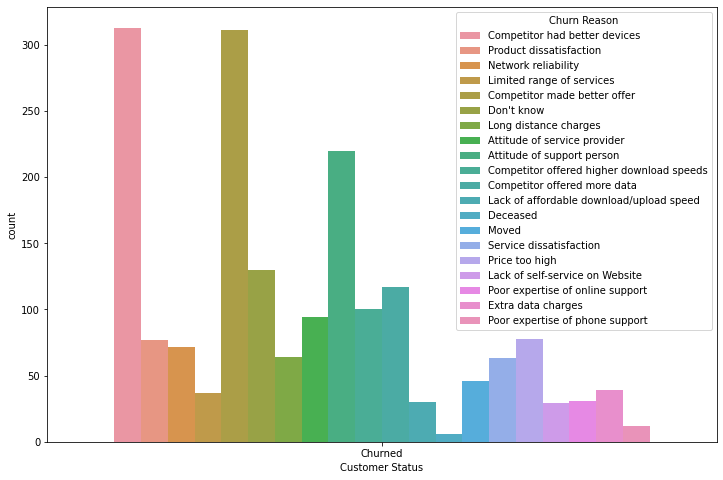

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=telecom[telecom['Customer Status']=='Churned'], x='Customer Status', hue='Churn Reason', ax=ax)

We have plotted the graph between the people who are churned and the churn reason. This has been used as a part of the exploratory data analysis but has been dropped for further modelling purposes as this is not giving any insights for the prediction.

### **2. Data Preprocessing and Cleaning**



A visual interpretation of the nulls in the dataset will give us a better view here of the columns which have nulls, with what percentage. The column, *Churn Reason* and *Churn Category* are full of nulls.

The columns *Internet Type, Avg Monthly GB Download, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV, Streaming Movies, Streaming Music, Unlimited Data* also have sum amount of nulls.

*Avg Monthly Long Distance Charges* and *Multiple Lines* also have some missing values.

#### 2.1 Finding Nulls

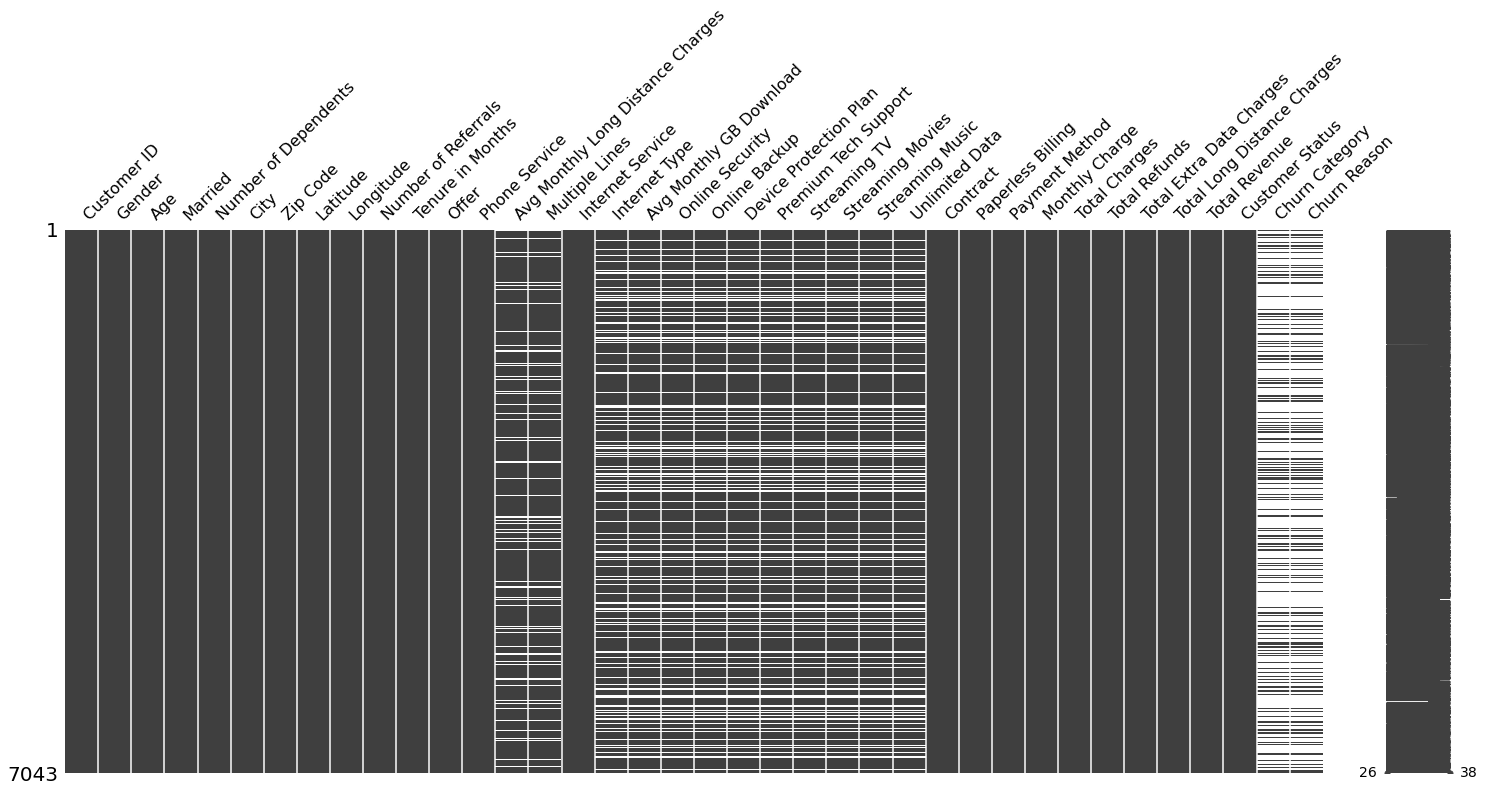

In [ ]:
# Library for visualization of missing value
import missingno as msno
msno.matrix(telecom)

To start with the cleaning, we go ahead by dropping *Churn Category* and *Churn Reason*. We are focusing on predicting the status of the customer, if they will churn out or not, so our study will not really focus on the reasons.

We will also drop off *Customer ID* as they are just the unique ID of the customers, which won't be that relevant in our prediction models.

Also, the data values in the column *Customer Status* has 3 unique values, which tell about the status, churned, stayed and joined. Again, since we will just look for status if the customer will leave or not, we will not consider the new joined customer data.

In [ ]:
#Dropping the whole columns
telecom = telecom.drop('Churn Category',axis=1)
telecom = telecom.drop('Churn Reason',axis=1)
telecom = telecom.drop('Customer ID',axis=1)

#dropping the data values of "Joined" in the customer status
telecom = telecom.loc[telecom['Customer Status'] != 'Joined']

After doing some tweaks with respect to dropping for cleaning, here are the following columns now.

In [ ]:
telecom.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status'],
      dtype='object')

#### 2.2 Replacing nulls

Let's start by replacing Null Values for 'Internet Type'

First, we check the count of customers with Internet Service

In [ ]:
a=telecom['Internet Service']
a.value_counts()

Yes    5245
No     1344
Name: Internet Service, dtype: int64

In [ ]:
b=telecom['Internet Type']
b.value_counts()

Fiber Optic    2934
DSL            1537
Cable           774
Name: Internet Type, dtype: int64

It is observed that the customers which did not opt for internet service, did not have the services like Online security, streaming movies, etc.
While they will not have internet service, there is no option for them to have the "type" of the internet too. Hence, we replace those blank values as "No Internet", to have a better understanding to interpret the data.

In [ ]:
telecom['Internet Type'] = telecom['Internet Type'].fillna('No Internet')
telecom['Avg Monthly GB Download'] = telecom['Avg Monthly GB Download'].fillna(0)
telecom['Online Security'] = telecom['Online Security'].fillna('No Internet')
telecom['Online Backup'] = telecom['Online Backup'].fillna('No Internet')
telecom['Device Protection Plan'] = telecom['Device Protection Plan'].fillna('No Internet')
telecom['Premium Tech Support'] = telecom['Premium Tech Support'].fillna('No Internet')
telecom['Streaming TV'] = telecom['Streaming TV'].fillna('No Internet')
telecom['Streaming Movies'] = telecom['Streaming Movies'].fillna('No Internet')
telecom['Streaming Music'] = telecom['Streaming Music'].fillna('No Internet')
telecom['Unlimited Data'] = telecom['Unlimited Data'].fillna('No Internet')

After we replace the nulls, we see we have only 2 columns left which have nulls.

In [ ]:
telecom.isna().sum()

Gender                                 0
Age                                    0
Married                                0
Number of Dependents                   0
City                                   0
Zip Code                               0
Latitude                               0
Longitude                              0
Number of Referrals                    0
Tenure in Months                       0
Offer                                  0
Phone Service                          0
Avg Monthly Long Distance Charges    644
Multiple Lines                       644
Internet Service                       0
Internet Type                          0
Avg Monthly GB Download                0
Online Security                        0
Online Backup                          0
Device Protection Plan                 0
Premium Tech Support                   0
Streaming TV                           0
Streaming Movies                       0
Streaming Music                        0
Unlimited Data  

Now we will start by replacing null values for Phone Services

Following the same startegy above, we checked with the customers who had opted for "Phone Service" option.
The customers who did not opt for this service will not have an option to the services of 'Multiple Lines' and 'Avg Monthly Long Distance Charges'. Hence, we replaced the null values with 'No Phone Service" to have a better interpretation of data.

In [ ]:
telecom['Phone Service'].value_counts()

Yes    5945
No      644
Name: Phone Service, dtype: int64

In [ ]:
telecom['Multiple Lines'] = telecom['Multiple Lines'].fillna('No Phone Service')
telecom['Avg Monthly Long Distance Charges'] = telecom['Avg Monthly Long Distance Charges'].fillna(0)

After all the null treatment is done, we again visualise the data and see that now our data looks pretty good to go ahead for the next steps.

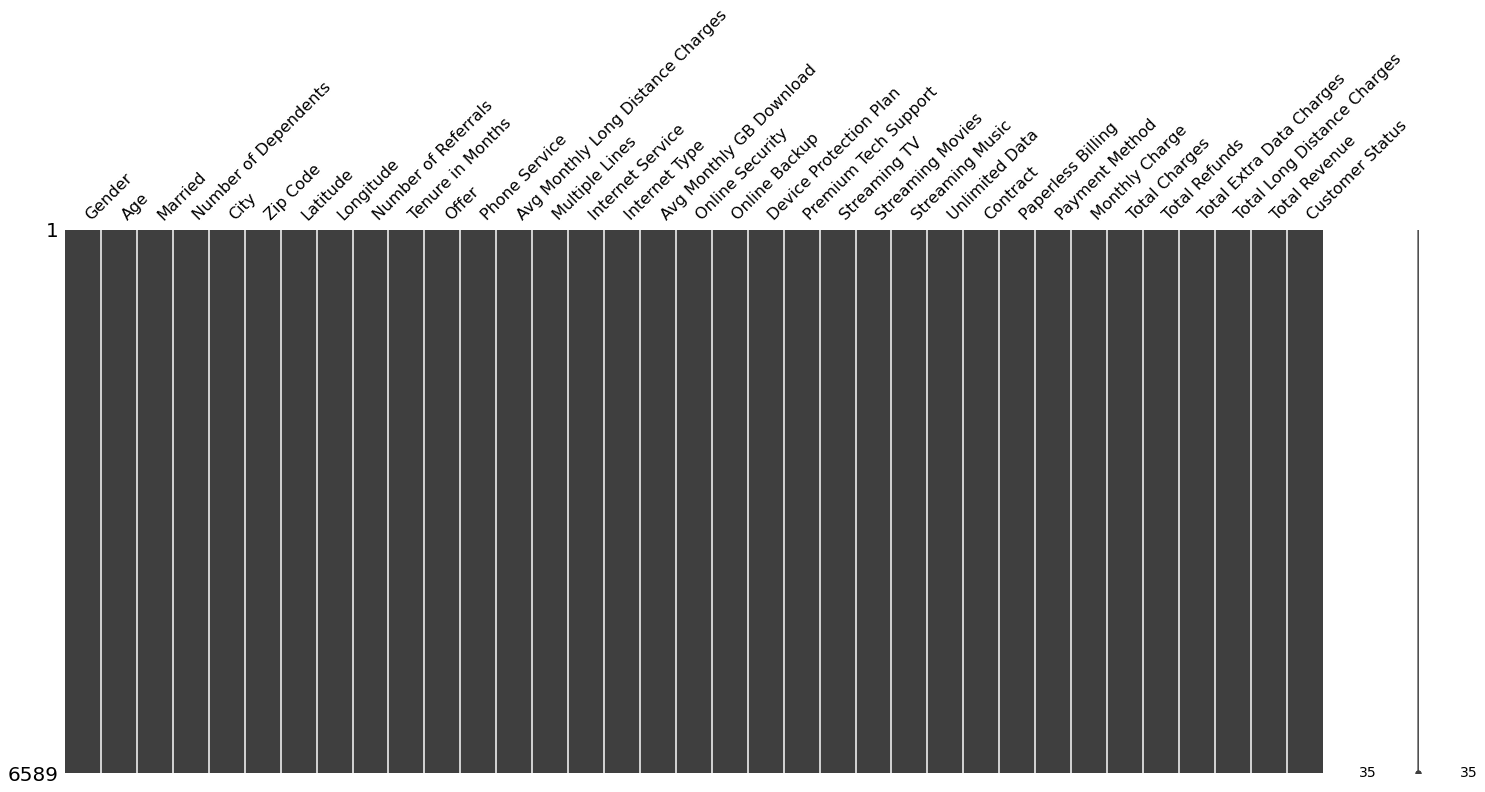

In [ ]:
# Library for visualization of missing value
import missingno as msno
msno.matrix(telecom)

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6589 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6589 non-null   object 
 1   Age                                6589 non-null   int64  
 2   Married                            6589 non-null   object 
 3   Number of Dependents               6589 non-null   int64  
 4   City                               6589 non-null   object 
 5   Zip Code                           6589 non-null   int64  
 6   Latitude                           6589 non-null   float64
 7   Longitude                          6589 non-null   float64
 8   Number of Referrals                6589 non-null   int64  
 9   Tenure in Months                   6589 non-null   int64  
 10  Offer                              6589 non-null   object 
 11  Phone Service                      6589 non-null   objec

Number of unique customers: 7043


#### 2.3 Finding outlliers

We will be working with the boxplots for detection of our outliers.

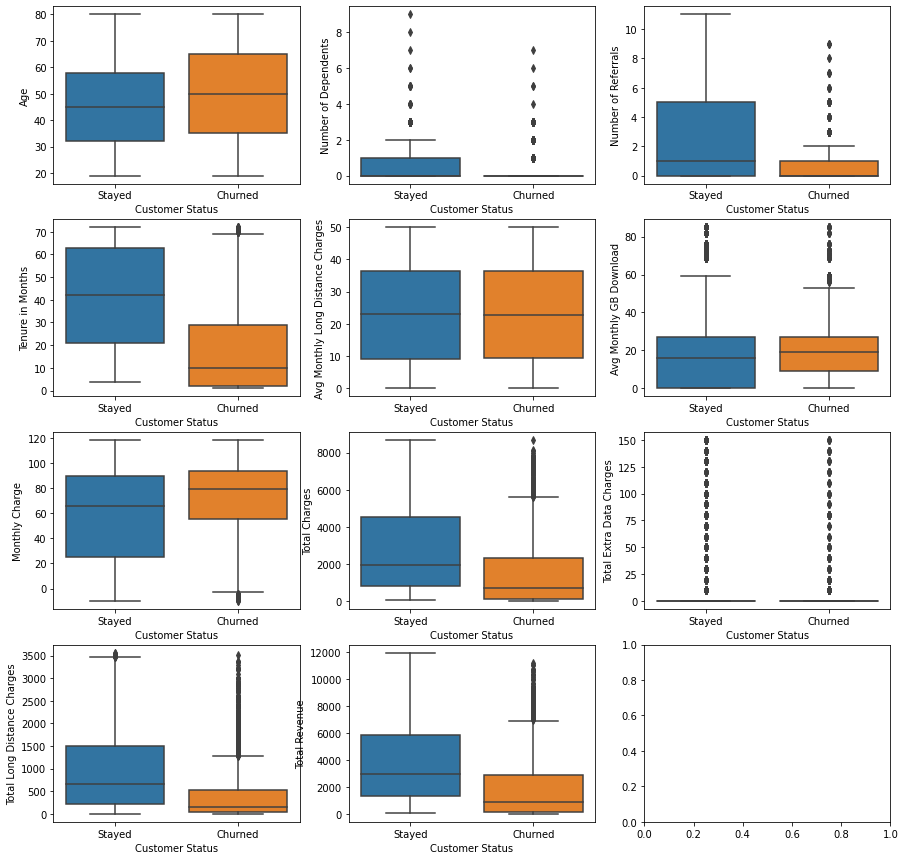

In [ ]:
colnames=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges',
                'Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(colnames, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = telecom, ax = subplot)

Even from the subplots, it is clear that some of the variables are highly skewed such as the Number of Dependents, Number of Referrals and Total Extra Data Charges.

Let us look into the histogram below to check the skewness:

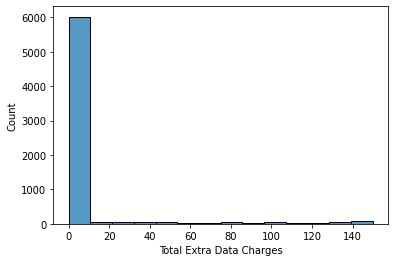

In [ ]:
sns.histplot(telecom['Total Extra Data Charges']);

In [ ]:
S=telecom['Total Extra Data Charges'].value_counts()
S.head()

0     5905
10     113
40      61
30      52
20      48
Name: Total Extra Data Charges, dtype: int64

The Total Extra Data Charges variables is highly skewed because the count for the range from 0-10 is extremely high when compared to other ranges. The value count for the range from 0-10 is around 6000 which covered 85% of the data.

#### 2.4 Data Transformation

We will now convert the variables as categorical for our model prediction step.

In [ ]:
telecom['Gender'] = pd.Categorical(telecom.Gender)
telecom['City'] = pd.Categorical(telecom.City)
telecom['Zip Code'] = pd.Categorical(telecom['Zip Code'])
telecom['Married'] = pd.Categorical(telecom.Married)
telecom['Phone Service'] = pd.Categorical(telecom['Phone Service'])
telecom['Multiple Lines'] = pd.Categorical(telecom['Multiple Lines'])
telecom['Internet Service'] = pd.Categorical(telecom['Internet Service'])
telecom['Internet Type'] = pd.Categorical(telecom['Internet Type'])
telecom['Online Security'] = pd.Categorical(telecom['Online Security'])
telecom['Online Backup'] = pd.Categorical(telecom['Online Backup'])
telecom['Device Protection Plan'] = pd.Categorical(telecom['Device Protection Plan'])
telecom['Premium Tech Support'] = pd.Categorical(telecom['Premium Tech Support'])
telecom['Streaming TV'] = pd.Categorical(telecom['Streaming TV'])
telecom['Streaming Movies'] = pd.Categorical(telecom['Streaming Movies'])
telecom['Streaming Music'] = pd.Categorical(telecom['Streaming Music'])
telecom['Unlimited Data'] = pd.Categorical(telecom['Unlimited Data'])
telecom['Contract'] = pd.Categorical(telecom['Contract'])
telecom['Paperless Billing'] = pd.Categorical(telecom['Paperless Billing'])
telecom['Payment Method'] = pd.Categorical(telecom['Payment Method'])
telecom['Payment Method'] = pd.Categorical(telecom['Payment Method'])
telecom['Customer Status'] = pd.Categorical(telecom['Customer Status'])

In [ ]:
telecom.dtypes

Gender                               category
Age                                     int64
Married                              category
Number of Dependents                    int64
City                                 category
Zip Code                             category
Latitude                              float64
Longitude                             float64
Number of Referrals                     int64
Tenure in Months                        int64
Offer                                  object
Phone Service                        category
Avg Monthly Long Distance Charges     float64
Multiple Lines                       category
Internet Service                     category
Internet Type                        category
Avg Monthly GB Download               float64
Online Security                      category
Online Backup                        category
Device Protection Plan               category
Premium Tech Support                 category
Streaming TV                      

### **3. Feature Selection**

In order to select the best features we have decided to use the feature_selection package from sklearn instead of manually dropping columns. We have decided to use a combined feature selection strategy due to the large size of our dataset. First, we created a preprocessing pipeline to impute numerical variables with median and standardize them using StandardScalar followed by imputing categorical variables with the most frequent value and passing them through OneHotEncoder.

Once the dataset is passed through the pre-processing pipeline we performed Univariate Feature Selection using SelectKbest from sklearn to select 50 best features. These 50 columns were selected based on ANOVA F-value. Following which, we performed Forward Sequential Selection using SequentialFeatureSelector from sklearn to further select best features from the previously selected 50 features. With Forward Sequential Selection we received 25 features as best features.

This entire Feature Selection process takes 12+ mins to run. Therefore, we used the pipeline processed dataset (normalized with StandardScalar and expanded with OneHotCoder) with best features selected in all our models. We have avoided using the pre-processing pipeline when running our models because it would take very long to process.

In [ ]:
data1 = telecom.copy()
#data = data1.drop('Zip Code', axis=1)

In [ ]:
df_X = telecom.drop('Customer Status', axis=1)
df_y = telecom['Customer Status']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse=False)) # returns a
        # regular matrix that can be combined easily with the data we get from
        # the numeric pipeline
    ])

SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out  #

prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9718e41c0>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fe96ffd0d00>)])

In [ ]:
processed_X = prep_pipeline.fit_transform(df_X, df_y)
df_processed_X = pd.DataFrame(processed_X,
                              columns = prep_pipeline.get_feature_names_out(),
                              index = df_X.index)
print(df_processed_X.shape)
df_processed_X.head()

(6589, 2793)


num__Age  num__Number of Dependents  num__Latitude  num__Longitude  \
0 -0.579600                  -0.491619      -0.554996        0.351930   
1 -0.045161                  -0.491619      -0.824038        0.720843   
2  0.192368                  -0.491619      -1.033094        0.851324   
3  1.855067                  -0.491619       0.734020       -1.093819   
4  1.676921                  -0.491619      -0.797613        0.314431   

   num__Number of Referrals  num__Tenure in Months  \
0                 -0.006926              -1.063957   
1                 -0.668349              -1.063957   
2                 -0.668349              -1.272578   
3                 -0.337638              -0.897060   
4                  0.323785              -1.314302   

   num__Avg Monthly Long Distance Charges  num__Avg Monthly GB Download  \
0                                1.253468                     -0.238987   
1                               -0.796233                     -0.533037   
2                                0.688345                      0.447129   
3                                0.311381                     -0.827087   
4                               -1.010255                     -0.484029   

   num__Monthly Charge  num__Total Charges  ...  \
0             0.018307           -0.811689  ...   
1            -2.219753           -0.834158  ...   
2             0.285202           -0.949616  ...   
3             1.060162           -0.527161  ...   
4             0.606762           -0.955553  ...   

   cat__Unlimited Data_No Internet  cat__Unlimited Data_Yes  \
0                              0.0                      1.0   
1                              0.0                      0.0   
2                              0.0                      1.0   
3                              0.0                      1.0   
4                              0.0                      1.0   

   cat__Contract_Month-to-Month  cat__Contract_One Year  \
0                           0.0                     1.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   

   cat__Contract_Two Year  cat__Paperless Billing_No  \
0                     0.0                        0.0   
1                     0.0                        1.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   cat__Paperless Billing_Yes  cat__Payment Method_Bank Withdrawal  \
0                         1.0                                  0.0   
1                         0.0                                  0.0   
2                         1.0                                  1.0   
3                         1.0                                  1.0   
4                         1.0                                  0.0   

   cat__Payment Method_Credit Card  cat__Payment Method_Mailed Check  
0                              1.0                               0.0  
1                              1.0                               0.0  
2                              0.0                               0.0  
3                              0.0                               0.0  
4                              1.0                               0.0  

[5 rows x 2793 columns]

#### 3.1 Univariate Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=50)
selector.fit_transform(df_processed_X, df_y)

cols = selector.get_support(indices=True)
features_df_new = df_processed_X.iloc[:,cols]

features_df_new.head()

num__Age  num__Number of Dependents  num__Number of Referrals  \
0 -0.579600                  -0.491619                 -0.006926   
1 -0.045161                  -0.491619                 -0.668349   
2  0.192368                  -0.491619                 -0.668349   
3  1.855067                  -0.491619                 -0.337638   
4  1.676921                  -0.491619                  0.323785   

   num__Tenure in Months  num__Monthly Charge  num__Total Charges  \
0              -1.063957             0.018307           -0.811689   
1              -1.063957            -2.219753           -0.834158   
2              -1.272578             0.285202           -0.949616   
3              -0.897060             1.060162           -0.527161   
4              -1.314302             0.606762           -0.955553   

   num__Total Long Distance Charges  num__Total Revenue  cat__Married_No  \
0                         -0.487965           -0.791908              0.0   
1                         -0.822156           -0.919617              1.0   
2                         -0.777187           -0.987873              1.0   
3                         -0.511217           -0.573051              0.0   
4                         -0.908919           -1.031984              0.0   

   cat__Married_Yes  ...  cat__Streaming Music_No Internet  \
0               1.0  ...                               0.0   
1               0.0  ...                               0.0   
2               0.0  ...                               0.0   
3               1.0  ...                               0.0   
4               1.0  ...                               0.0   

   cat__Unlimited Data_No Internet  cat__Unlimited Data_Yes  \
0                              0.0                      1.0   
1                              0.0                      0.0   
2                              0.0                      1.0   
3                              0.0                      1.0   
4                              0.0                      1.0   

   cat__Contract_Month-to-Month  cat__Contract_One Year  \
0                           0.0                     1.0   
1                           1.0                     0.0   
2                           1.0                     0.0   
3                           1.0                     0.0   
4                           1.0                     0.0   

   cat__Contract_Two Year  cat__Paperless Billing_No  \
0                     0.0                        0.0   
1                     0.0                        1.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   cat__Paperless Billing_Yes  cat__Payment Method_Bank Withdrawal  \
0                         1.0                                  0.0   
1                         0.0                                  0.0   
2                         1.0                                  1.0   
3                         1.0                                  1.0   
4                         1.0                                  0.0   

   cat__Payment Method_Credit Card  
0                              1.0  
1                              1.0  
2                              0.0  
3                              0.0  
4                              1.0  

[5 rows x 50 columns]

#### 3.2 Sequential Feature Selection

In [ ]:
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
sfs = SequentialFeatureSelector(rfc)
sfs.fit(features_df_new, df_y)
SequentialFeatureSelector(estimator=RandomForestClassifier(n_estimators=20, random_state=42))
sfs.get_support()
new_df = sfs.transform(features_df_new)

In [ ]:
cols1 = sfs.get_support(indices=True)
df_3 = features_df_new.iloc[:,cols1]
df_3.columns

Index(['num__Age', 'num__Number of Dependents', 'num__Number of Referrals',
       'num__Tenure in Months', 'num__Monthly Charge', 'num__Total Charges',
       'num__Total Revenue', 'cat__Married_Yes', 'cat__City_San Diego',
       'cat__Zip Code_92122', 'cat__Zip Code_92130',
       'cat__Internet Type_Fiber Optic', 'cat__Internet Type_No Internet',
       'cat__Online Security_Yes', 'cat__Online Backup_Yes',
       'cat__Device Protection Plan_No Internet',
       'cat__Premium Tech Support_Yes', 'cat__Streaming TV_No Internet',
       'cat__Streaming Music_No', 'cat__Contract_Month-to-Month',
       'cat__Contract_One Year', 'cat__Contract_Two Year',
       'cat__Paperless Billing_No', 'cat__Paperless Billing_Yes',
       'cat__Payment Method_Credit Card'],
      dtype='object')

In [ ]:
telecom_data = df_3
telecom_data.head(5)

num__Age  num__Number of Dependents  num__Number of Referrals  \
0 -0.579600                  -0.491619                 -0.006926   
1 -0.045161                  -0.491619                 -0.668349   
2  0.192368                  -0.491619                 -0.668349   
3  1.855067                  -0.491619                 -0.337638   
4  1.676921                  -0.491619                  0.323785   

   num__Tenure in Months  num__Monthly Charge  num__Total Charges  \
0              -1.063957             0.018307           -0.811689   
1              -1.063957            -2.219753           -0.834158   
2              -1.272578             0.285202           -0.949616   
3              -0.897060             1.060162           -0.527161   
4              -1.314302             0.606762           -0.955553   

   num__Total Revenue  cat__Married_Yes  cat__City_San Diego  \
0           -0.791908               1.0                  0.0   
1           -0.919617               0.0                  0.0   
2           -0.987873               0.0                  0.0   
3           -0.573051               1.0                  0.0   
4           -1.031984               1.0                  0.0   

   cat__Zip Code_92122  ...  cat__Device Protection Plan_No Internet  \
0                  0.0  ...                                      0.0   
1                  0.0  ...                                      0.0   
2                  0.0  ...                                      0.0   
3                  0.0  ...                                      0.0   
4                  0.0  ...                                      0.0   

   cat__Premium Tech Support_Yes  cat__Streaming TV_No Internet  \
0                            1.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            1.0                            0.0   

   cat__Streaming Music_No  cat__Contract_Month-to-Month  \
0                      1.0                           0.0   
1                      0.0                           1.0   
2                      1.0                           1.0   
3                      1.0                           1.0   
4                      1.0                           1.0   

   cat__Contract_One Year  cat__Contract_Two Year  cat__Paperless Billing_No  \
0                     1.0                     0.0                        0.0   
1                     0.0                     0.0                        1.0   
2                     0.0                     0.0                        0.0   
3                     0.0                     0.0                        0.0   
4                     0.0                     0.0                        0.0   

   cat__Paperless Billing_Yes  cat__Payment Method_Credit Card  
0                         1.0                              1.0  
1                         0.0                              1.0  
2                         1.0                              0.0  
3                         1.0                              0.0  
4                         1.0                              1.0  

[5 rows x 25 columns]

#### 3.3 Splitting Data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_X, test_X, train_y, test_y = train_test_split(telecom_data, df_y, test_size = .2, random_state=0) #split all
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.fit_transform(test_y)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((5271, 25), (1318, 25), (5271,), (1318,))

Once the feature selection has been done, the transformed data has been split into train and test data in a 80/20 split respectively.

Thus there are 5271 train rows, and 1318 test rows. The feature selection had first expanded, and then reduced the number of columns to 25.

### **4. Different Classification Models**

Our next step is to run the training and test data into various different classification models, to ascertain which provides us the best accuracy on the train and test datasets.

The four classification models we are using for our purposes are:

Random Forest Classifier
K- Nearest Neighbor
SVC
Logistic Regression
Please note that we will not be using desicion tree classifier, as we are already using a random forest classifier which in itself is composed of various desicion trees.However the additional benefit of random forest is that they are less sensitive to the training data in comparision, and subsequently have lower variance.

*Note:* As mentioned earlier, the entire Feature Selection process takes 12+ mins to run. Therefore, we used the pipeline processed dataset (normalized with StandardScalar and expanded with OneHotCoder) with best features selected in all our models. We have avoided using the pre-processing pipeline when running our models because it would take very long to process.

#### 4.1 Random Forest Classifier

A Random forest classifier works by randomly selecting rows from the dataset through random sampling with replacement (a process called bootstrapping). Then it runs a decision tree through each of the bootstrapped datasets respectively. This ensures that we are not using the same data for each tree, which helps the model be less sensitive to the original training data.

Furthermore through random feature selection only some features are run on each bootstrapped dataset to build the desicion trees. This helps to reduce the correlation between the different trees, which helps reduce the variance.

As this is a classification problem, these results from each desicion tree are then aggregated into final results through majority voting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:
forest_clf_scores_a = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='accuracy')
forest_clf_scores_ba = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='balanced_accuracy')
forest_clf_scores_p = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='precision')
forest_clf_scores_r = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='recall')
forest_clf_scores_f1 = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='f1')

In [ ]:
print('Accuracy',forest_clf_scores_a.mean().round(4))
print('Balanced Accuracy', forest_clf_scores_ba.mean().round(4))
print('Precision', forest_clf_scores_p.mean().round(4))
print('Recall', forest_clf_scores_r.mean().round(4))
print('F1-score', forest_clf_scores_f1.mean().round(4))

Accuracy 0.8668
Balanced Accuracy 0.8158
Precision 0.8855
Recall 0.9347
F1-score 0.9093


We have set the n_estimators = 100, which means that we will run 100 decision trees before taking majority voting.

We are also calculating the cross validation score, which is splitting the training dataset into 10 folds, with the 9 parts training fold, and one part test fold. This is done 10 times, with the test fold being different each time, and the average of the test scores is taken, this ensures that every value in our training dataset is being used for testing exactly once.

We see that the accuracy of the model is 0.8668, while the balanced accuracy is 0.8158.

The presicion is 0.8855, while the recall is 0.9347. The precision tells us what proportion of the positive identifications were actually correct, while the recall tells us what proportion of actual positives were correctly identified. The numbers tell us that our model did much better on Recall than on presicion.

The F1-score takes a balance between recall and precision, and in this case is 0.9093

#### 4.2 K-Nearest Neighbour

K-Nearest Neighbor is a classification technique that classifies datapoints through the majority voting of the K nearest points. We have set the number of K nearest points to the default value, which is 5. Again we are using cross validation scoring to get the scores on our dataset.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [ ]:
knn_scores_a = cross_val_score(knn, train_X, train_y, cv=10, scoring='accuracy')
knn_scores_ba = cross_val_score(knn, telecom_data, df_y, cv=10, scoring='balanced_accuracy')
knn_scores_p = cross_val_score(knn, train_X, train_y, cv=10, scoring='precision')
knn_scores_r = cross_val_score(knn, train_X, train_y, cv=10, scoring='recall')
knn_scores_f1 = cross_val_score(knn, train_X, train_y, cv=10, scoring='f1')

In [ ]:
print('Accuracy', knn_scores_a.mean().round(4))
print('Balanced Accuracy', knn_scores_ba.mean().round(4))
print('Precision', knn_scores_p.mean().round(4))
print('Recall', knn_scores_r.mean().round(4))
print('F1-score', knn_scores_f1.mean().round(4))

Accuracy 0.8334
Balanced Accuracy 0.7917
Precision 0.8742
Recall 0.8959
F1-score 0.8849


Over here we see that the accuracy is 0.8334, the balanced accuracy is 0.7917, Precision is 0.8742, Recall is 0.8959, and the F-1 Score is 0.8849.

All of our scores (accuracy, balanced accuracy, precision, recall and F-1 score) are lower than in the Random Forest classifier, suggesting that for our dataset, the Random Forest Classifier is a better classification model to use.

#### 4.3 SVM

Support vector machine draws a hyper plane in n dimensional space such that it maximizes the margin between classifiction groups.

In [ ]:
from sklearn.svm import SVC

svc =  SVC(gamma="auto")

In [ ]:
svc_scores_a = cross_val_score(svc, train_X, train_y, cv=10, scoring='accuracy')
svc_scores_ba = cross_val_score(svc, telecom_data, df_y, cv=10, scoring='balanced_accuracy')
svc_scores_p = cross_val_score(svc, train_X, train_y, cv=10, scoring='precision')
svc_scores_r = cross_val_score(svc, train_X, train_y, cv=10, scoring='recall')
svc_scores_f1 = cross_val_score(svc, train_X, train_y, cv=10, scoring='f1')

In [ ]:
print('Accuracy', svc_scores_a.mean().round(4))
print('Balanced Accuracy', svc_scores_ba.mean().round(4))
print('Precision', svc_scores_p.mean().round(4))
print('Recall', svc_scores_r.mean().round(4))
print('F1-score', svc_scores_f1.mean().round(4))

Accuracy 0.8596
Balanced Accuracy 0.8194
Precision 0.8899
Recall 0.9172
F1-score 0.9032


The accuracy is 0.8596, the balanced accuracy is 0.8194, the precision is 0.8899 while the recall is 0.9172 and the F-1 score is 0.9032.

While the scores are higher than for K-nearest neighbors, once again we see that they are lower than for Random Forest classifier, suggesting that the latter classification technique is still more appropriate for our dataset.

#### 4.4 Logistic Regression

Logistic Regression is a classification technique that uses a logistic function to model the dependent variable (in our case whether a customer churns or not).

The dependent variable is dichotomous in nature, and can only have two possible classes (churned or not churned). Thus, this technique is used while dealing with binary data.

We are passing a parameter max_iter = 1000, which is the *maximum number of iterations to converge.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

lr = LogisticRegression(max_iter=1000)


In [ ]:
lr_scores_a = cross_val_score(lr, train_X, train_y, cv=10, scoring='accuracy')
lr_scores_ba = cross_val_score(lr, train_X, train_y, cv=10, scoring='balanced_accuracy')
lr_scores_p = cross_val_score(lr, train_X, train_y, cv=10, scoring='precision')
lr_scores_r = cross_val_score(lr, train_X, train_y, cv=10, scoring='recall')
lr_scores_f1 = cross_val_score(lr, train_X, train_y, cv=10, scoring='f1')

In [ ]:
print('Accuracy', lr_scores_a.mean().round(4))
print('Balanced Accuracy', lr_scores_ba.mean().round(4))
print('Precision', lr_scores_p.mean().round(4))
print('Recall', lr_scores_r.mean().round(4))
print('F1-score', lr_scores_f1.mean().round(4))

Accuracy 0.8516
Balanced Accuracy 0.818
Precision 0.8961
Recall 0.8965
F1-score 0.8962


The Accuracy score is 0.8516, the balanced accuracy score is 0.818, the precision is 0.8916, recall 0.8965, and F-1 score is 0.8962.

These scores are also lower than the ones for the Random Forest Classifier. Thus out of our four models, the Random Forest Classifier is the best classification model for this dataset.

### **5. Accounting for Imbalanced Data**

Since our dataset had an imbalance in the number of churned and did not churn customers, it might be better to use the Random Forest Classifier with balanced class_weight.

As we see below, this did improve our overall scores slightly for all of the scoring methods we used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

In [ ]:
forest_clf_scores_a = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='accuracy')
forest_clf_scores_ba = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='balanced_accuracy')
forest_clf_scores_p = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='precision')
forest_clf_scores_r = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='recall')
forest_clf_scores_f1 = cross_val_score(forest_clf, train_X, train_y, cv=10, scoring='f1')

In [ ]:
print('Accuracy',forest_clf_scores_a.mean().round(4))
print('Balanced Accuracy', forest_clf_scores_ba.mean().round(4))
print('Precision', forest_clf_scores_p.mean().round(4))
print('Recall', forest_clf_scores_r.mean().round(4))
print('F1-score', forest_clf_scores_f1.mean().round(4))

Accuracy 0.8719
Balanced Accuracy 0.82
Precision 0.8868
Recall 0.9411
F1-score 0.9131


### **6. Hyper Tuning**

After accoounting for imbalanced data in our dataset, we will be hypertuning the balanced dataset. This will allow us to identify the best parameters for the Random Forest Classifier which will provide us with the highest score. We will be using the below Hypertuning methods:

Random Search: Random combinations of hyperparameters are selected and used to train a model, and then the best random hyperparameter combinations are used.

Grid Search: The domain of the hyperparameters is divided into a discrete grid, and every combination of values on this grid is tested.

Halving Random: Randomized search on hyper parameters. The search strategy starts evaluating all the candidates with a small amount of resources and iteratively selects the best candidates, using more and more resources. The candidates are sampled at random from the parameter space and the number of sampled candidates is determined by n_candidates.

Halving Grid Search: Searches over specified parameter values with successive halving, with the selected parameters in each iteration moving onto the next one. The initial iterations use very small amount of resources, but this increases with each sucessive iteration.

To consider - grid search and halving random

In [ ]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [ ]:
#random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

full_pipeline = Pipeline([
 #   ("preprocessing", prep_pipeline),
    ("random_forest", forest_clf),
])
param_distribs = [
    {'random_forest__max_depth': randint(2, 100),
    'random_forest__min_samples_leaf': randint(2, 100),
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]
random_search = RandomizedSearchCV(full_pipeline, param_distribs, n_iter=20, cv=10,
                                 scoring='balanced_accuracy', random_state=0)
random_search.fit(train_X, train_y)
random_search.best_estimator_
cv_res = pd.DataFrame(random_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8        0.698069      0.094859         0.028795        0.006611   
15       0.477630      0.018059         0.018316        0.000910   
13       0.467370      0.013942         0.020213        0.002976   
5        1.654541      0.306071         0.027446        0.014796   
12       1.283082      0.028522         0.019921        0.003869   

   param_random_forest__max_depth param_random_forest__max_features  \
8                              79                              sqrt   
15                             76                              sqrt   
13                             34                              log2   
5                              67                              None   
12                             21                              None   

   param_random_forest__min_samples_leaf  \
8                                     11   
15                                    25   
13                                    11   
5                                     41   
12                                    41   

                                               params  split0_test_score  \
8   {'random_forest__max_depth': 79, 'random_fores...           0.842289   
15  {'random_forest__max_depth': 76, 'random_fores...           0.847568   
13  {'random_forest__max_depth': 34, 'random_fores...           0.844924   
5   {'random_forest__max_depth': 67, 'random_fores...           0.832338   
12  {'random_forest__max_depth': 21, 'random_fores...           0.832338   

    split1_test_score  ...  split3_test_score  split4_test_score  \
8            0.859027  ...           0.805013           0.846340   
15           0.861034  ...           0.795119           0.824403   
13           0.844368  ...           0.809708           0.831715   
5            0.843722  ...           0.800460           0.844403   
12           0.843722  ...           0.800460           0.844403   

    split5_test_score  split6_test_score  split7_test_score  \
8            0.841034           0.864652           0.824864   
15           0.836446           0.880557           0.813548   
13           0.830389           0.869293           0.822856   
5            0.841105           0.859958           0.815529   
12           0.841105           0.859958           0.815529   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
8            0.865304           0.843455         0.846764        0.019839   
15           0.861315           0.843455         0.842451        0.024422   
13           0.865304           0.842125         0.841907        0.017945   
5            0.863270           0.840117         0.840527        0.019458   
12           0.863270           0.840117         0.840527        0.019458   

    rank_test_score  
8                 1  
15                2  
13                3  
5                 4  
12                4  

[5 rows x 21 columns]

In [ ]:
#grid search

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

full_pipeline = Pipeline([
#    ("preprocessing", preprocess_pipeline),
    ("random_forest",  forest_clf),
])
param_distribs = [
    {'random_forest__max_depth': [2, 5, 10, 15],
    'random_forest__min_samples_leaf': [2, 5, 10, 15],
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]
grid_search = GridSearchCV(full_pipeline, param_distribs, cv=3, scoring='balanced_accuracy')
grid_search.fit(train_X, train_y)

grid_search.best_estimator_
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
25       0.414689      0.005269         0.035838        0.001221   
47       1.076190      0.005076         0.034092        0.002275   
35       1.062029      0.008305         0.032432        0.000503   
34       1.116057      0.022436         0.033429        0.001371   
33       1.165958      0.005122         0.034100        0.002145   

   param_random_forest__max_depth param_random_forest__max_features  \
25                             10                              sqrt   
47                             15                              None   
35                             10                              None   
34                             10                              None   
33                             10                              None   

   param_random_forest__min_samples_leaf  \
25                                     5   
47                                    15   
35                                    15   
34                                    10   
33                                     5   

                                               params  split0_test_score  \
25  {'random_forest__max_depth': 10, 'random_fores...           0.853494   
47  {'random_forest__max_depth': 15, 'random_fores...           0.853471   
35  {'random_forest__max_depth': 10, 'random_fores...           0.852081   
34  {'random_forest__max_depth': 10, 'random_fores...           0.848879   
33  {'random_forest__max_depth': 10, 'random_fores...           0.846878   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
25           0.832669           0.850996         0.845720        0.009284   
47           0.833068           0.849402         0.845314        0.008817   
35           0.833068           0.849602         0.844917        0.008439   
34           0.837251           0.848406         0.844846        0.005374   
33           0.839442           0.846614         0.844311        0.003445   

    rank_test_score  
25                1  
47                2  
35                3  
34                4  
33                5

In [ ]:
#halving random

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint
full_pipeline = Pipeline([
  #  ("preprocessing", preprocess_pipeline),
    ("random_forest", forest_clf),
])
param_distribs = [
    {'random_forest__max_depth': randint(2, 100),
    'random_forest__min_samples_leaf': randint(2, 100),
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]

halving_random_search = HalvingRandomSearchCV(full_pipeline, param_distribs,
                                      n_candidates=25, cv=3,
                                      min_resources='exhaust',
                                      scoring='balanced_accuracy',
                                      random_state=0)
halving_random_search.fit(train_X, train_y)
halving_random_search.best_estimator_
halving_random_cv_res = pd.DataFrame(halving_random_search.cv_results_)
halving_random_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
halving_random_cv_res.head()

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
31     1         1755       0.213628      0.006164         0.020725   
33     1         1755       0.191853      0.006387         0.019657   
29     1         1755       0.402530      0.025487         0.018226   
32     1         1755       0.191809      0.005860         0.021949   
34     2         5265       1.117158      0.011417         0.034793   

    std_score_time param_random_forest__max_depth  \
31        0.001466                             60   
33        0.001434                             34   
29        0.000734                             37   
32        0.006613                             79   
34        0.001867                             37   

   param_random_forest__max_features param_random_forest__min_samples_leaf  \
31                              sqrt                                     3   
33                              log2                                    11   
29                              None                                    13   
32                              sqrt                                    11   
34                              None                                    13   

                                               params  ...  split1_test_score  \
31  {'random_forest__max_depth': 60, 'random_fores...  ...           0.845925   
33  {'random_forest__max_depth': 34, 'random_fores...  ...           0.840007   
29  {'random_forest__max_depth': 37, 'random_fores...  ...           0.822502   
32  {'random_forest__max_depth': 79, 'random_fores...  ...           0.836534   
34  {'random_forest__max_depth': 37, 'random_fores...  ...           0.835163   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
31           0.854518         0.857198        0.010471                1   
33           0.843674         0.845721        0.005689                2   
29           0.852735         0.845004        0.016169                3   
32           0.842793         0.843946        0.006573                4   
34           0.850097         0.843903        0.006357                5   

    split0_train_score  split1_train_score  split2_train_score  \
31            0.940366            0.951357            0.953387   
33            0.859884            0.872200            0.866446   
29            0.879161            0.881528            0.870686   
32            0.868482            0.870145            0.873308   
34            0.896900            0.894230            0.888914   

    mean_train_score  std_train_score  
31          0.948370         0.005720  
33          0.866177         0.005032  
29          0.877125         0.004655  
32          0.870645         0.002002  
34          0.893348         0.003319  

[5 rows x 21 columns]

In [ ]:
#halving grid

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from scipy.stats import randint
full_pipeline = Pipeline([
 #   ("preprocessing", preprocess_pipeline),
    ("random_forest", forest_clf),
])
param_distribs = [
    {'random_forest__max_depth': [2, 5, 10, 15],
    'random_forest__min_samples_leaf': [2, 5, 10, 15],
    'random_forest__max_features': ["sqrt", "log2", None]},
    ]
# This is where we switch to halving version ...
halving_grid_search = HalvingGridSearchCV(full_pipeline, param_distribs, cv=3,
                                    min_resources='exhaust', # use all data in the last round, start with as needed
                                    scoring='balanced_accuracy')
halving_grid_search.fit(train_X, train_y)
halving_grid_search.best_estimator_
halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)
halving_grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
halving_grid_cv_res.head()

iter  n_resources  mean_fit_time  std_fit_time  mean_score_time  \
17     0          195       0.125415      0.003117         0.011738   
16     0          195       0.128054      0.004674         0.013585   
40     0          195       0.142640      0.005651         0.012739   
28     0          195       0.124007      0.001577         0.011816   
70     3         5265       0.381673      0.021381         0.037858   

    std_score_time param_random_forest__max_depth  \
17        0.000187                              5   
16        0.001987                              5   
40        0.000876                             15   
28        0.000657                             10   
70        0.003902                             10   

   param_random_forest__max_features param_random_forest__min_samples_leaf  \
17                              log2                                     5   
16                              log2                                     2   
40                              log2                                     2   
28                              log2                                     2   
70                              log2                                     2   

                                               params  ...  split1_test_score  \
17  {'random_forest__max_depth': 5, 'random_forest...  ...           0.883867   
16  {'random_forest__max_depth': 5, 'random_forest...  ...           0.868421   
40  {'random_forest__max_depth': 15, 'random_fores...  ...           0.842105   
28  {'random_forest__max_depth': 10, 'random_fores...  ...           0.842105   
70  {'random_forest__max_depth': 10, 'random_fores...  ...           0.834167   

    split2_test_score  mean_test_score  std_test_score  rank_test_score  \
17           0.905462         0.855332        0.056319                1   
16           0.889356         0.848148        0.044306                2   
40           0.889356         0.846043        0.033872                3   
28           0.889356         0.846043        0.033872                3   
70           0.847387         0.843512        0.006640                5   

    split0_train_score  split1_train_score  split2_train_score  \
17            0.924507            0.945833            0.895080   
16            0.942579            0.981944            0.936461   
40            0.989362            1.000000            0.957641   
28            0.989362            1.000000            0.957641   
70            0.909542            0.913050            0.909349   

    mean_train_score  std_train_score  
17          0.921807         0.020808  
16          0.953662         0.020154  
40          0.982334         0.017993  
28          0.982334         0.017993  
70          0.910647         0.001701  

[5 rows x 21 columns]

Comparing the Mean test scores for all the Hyper Tuning methods, we see that the best score is gained through the Halving Random method (0.8571).

For this score to be gained, the best parameters are:

param_random_forest__max_depth: 60
param_random_forest__max_features: SQrt
param_random_forest__min_samples_leaf: 3

### **7. Evaluating error on the untest data**

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

final_model = halving_random_search.best_estimator_  # includes preprocessing
final_predictions = final_model.predict(test_X)

final_a = accuracy_score(test_y,final_predictions)
final_ba = balanced_accuracy_score(test_y, final_predictions)
final_p = precision_score(test_y, final_predictions)
final_r = recall_score(test_y, final_predictions)
final_f1 = f1_score(test_y, final_predictions)

In [ ]:
print('Accuracy',round(final_a,4))
print('Balanced accuracy',round(final_ba,4))
print('Precision',round(final_p,4))
print('Recall',round(final_r,4))
print('F1-Score',round(final_f1,4))

Accuracy 0.8627
Balanced accuracy 0.8542
Precision 0.9328
Recall 0.8732
F1-Score 0.902


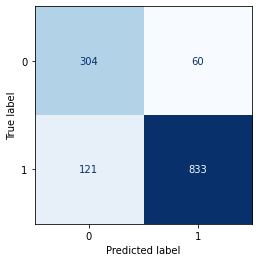

In [ ]:
 cmd = ConfusionMatrixDisplay.from_predictions(test_y, final_predictions, cmap=plt.cm.Blues, colorbar=False)

Our hyper-tuning process used balanced accuracy as the scoring method. The balanced accuracy score on our test data was 85.42% compared to 85.72% score on our train data. As expected the balanced accuracy was lower on the test data.

### **8. Boosting**

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = HistGradientBoostingClassifier(max_leaf_nodes=16, max_iter=10, learning_rate=.1)
hgb_clf.fit(train_X, train_y)

print('Balanced accuracy',round(balanced_accuracy_score(test_y, hgb_clf.predict(test_X)),4))

Balanced accuracy 0.8055


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, randint

param_grid = {'max_leaf_nodes': randint(2, 16),
              'max_iter': randint(50, 250),
              'learning_rate': loguniform(1e-2, 0.2)}

rand_search = RandomizedSearchCV(HistGradientBoostingClassifier(random_state=0),
                                 param_grid, cv=10, n_iter = 50, scoring='balanced_accuracy',
                                 random_state=42)

rand_search.fit(train_X, train_y)
rand_cv_res = pd.DataFrame(rand_search.cv_results_)
rand_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rand_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

param_learning_rate param_max_iter param_max_leaf_nodes  mean_test_score
16            0.112655             58                   11         0.835827
29             0.02286            206                   14         0.833700
33             0.08881             82                   12         0.833041
0             0.030711            142                   12         0.831508
21            0.072772             51                   15         0.831179

In [ ]:
hgb_hp = rand_search.best_estimator_  # includes preprocessing

hgb_hp_p = hgb_hp.predict(test_X)

hgb_hp_a = accuracy_score(test_y, hgb_hp_p)
hgb_hp_ba = balanced_accuracy_score(test_y, hgb_hp_p)
hgb_hp_p = precision_score(test_y, hgb_hp_p)

In [ ]:
hgb_hp_p = hgb_hp.predict(test_X)
hgb_hp_r = recall_score(test_y, hgb_hp_p)
hgb_hp_f1 = f1_score(test_y, hgb_hp_p)

In [ ]:
print('Accuracy',round(hgb_hp_a,4))
print('Balanced accuracy',round(hgb_hp_ba,4))
print('Recall',round(hgb_hp_r,4))
print('F1-Score',round(hgb_hp_f1,4))

Accuracy 0.8915
Balanced accuracy 0.846
Recall 0.9476
F1-Score 0.9267


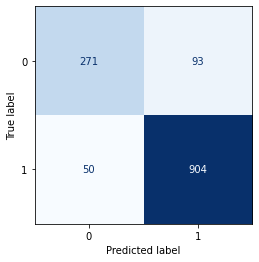

In [ ]:
cmd1 = ConfusionMatrixDisplay.from_predictions(test_y, hgb_hp_p, cmap=plt.cm.Blues, colorbar=False)

We used HistGradientBoosting and achieved a model that was almost similar to our best hyper-tuned model. Our hyper-tuned model predicted better on the churned category. However, our hyper-tuned model was trained using balanced data and the HistGradientBossting was run on unbalanced data. Since HisGradientBoosting does not have a class_weight parameter we would need a better balancing strategy. Using HistGradientBossting with a balanced dataset may improve the results further.

### **9. Conclusion**

Our objectives in this project were to identify the variables in our dataset which could be used to predict costumer churn, as well as find the best method for predicting customer churn. Towards this end, we first did exploratory data analysis and transformation, and then built a pipeline for feature selection to get the 50, and then 25  best features which most strongly impacted our dependent variable. We then found the classification model which gave us the highest accuracy score.

We found that the Random forest classifier gave the best balanced accuracy of 81.58%. We then accounted for imbalance in our dataset, and tested several hyper parameter tuning method, ultimating finding that Halving Random Search CV gave us the best balanced accuracy score of 85.72%. We then tried Hist Gradient boosting but that did not significantly improve our results.

Furthermore, during our feature selection, we identified the key variables which explained our dependent variable, some of which were:hich were:

* Family Characteristics (Age, martital status, no. of dependents)
* Location (San Diego)
* Payment method (credit card)
* Contract Type
* Charges
* Internet Type


Certain services:

* Premium Tech Support
* Streaming TV
* Streaming Music
* Online Security
* Online Backup